In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [7]:
d1 = df.isnull().sum()
d1

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
print(type(d1))

<class 'pandas.core.series.Series'>


In [10]:
d2 = d1.reset_index()
d2.columns = ['Name','Count']
d2

,Name,Count
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,177
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


In [12]:
d2['Percent'] = (d2['Count']*100)/df.shape[0]
d2

,Name,Count,Percent
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Name,0,0.000000
4,Sex,0,0.000000
5,Age,177,19.865320
6,SibSp,0,0.000000
7,Parch,0,0.000000
8,Ticket,0,0.000000
9,Fare,0,0.000000


In [13]:
d3 = d2[(d2['Count']>0) & d2['Percent']>0]
d3

,Name,Count,Percent
5,Age,177,19.865320
10,Cabin,687,77.104377
11,Embarked,2,0.224467


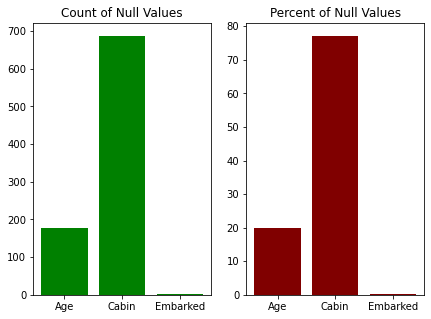

In [18]:
fig ,(ax1,ax2)  = plt.subplots(1,2,figsize=(7,5))

ax1.bar(d3['Name'],d3['Count'],color='green')
ax1.set_title('Count of Null Values')

ax2.bar(d3['Name'],d3['Percent'],color='maroon')
ax2.set_title('Percent of Null Values')

plt.show()

In [21]:
print(df.shape)
d3
# fill null values
# drop the records and/or columns

# Age - fill na values
# Cabin - drop Cabin Column
# Embarked - drop records (rows) or fill na values

(891, 12)


,Name,Count,Percent
5,Age,177,19.865320
10,Cabin,687,77.104377
11,Embarked,2,0.224467


In [24]:
print(df['Age'].mean())
print(df['Age'].median())
print(df['Age'].mode())

29.69911764705882
28.0
0    24.0
dtype: float64


In [26]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df.drop('Cabin',axis=1,inplace=True)

In [29]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [30]:
df.dropna(inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
df.shape

(889, 11)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [34]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
df['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [39]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [40]:
# # Columns to drop
# 1) Cabin
# 2) PassendgerID
# 3) Name
# 4) Ticket

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
df.drop(['PassengerId',"Name",'Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
lb = LabelEncoder()
df['Sex'] = lb.fit_transform(df['Sex'])
df['Embarked'] = lb.fit_transform(df['Embarked'])

In [45]:
df['Embarked'].value_counts()
# S    644
# C    168
# Q     77

2    644
0    168
1     77
Name: Embarked, dtype: int64

In [46]:
df['Sex'].value_counts()
# male      577
# female    312

1    577
0    312
Name: Sex, dtype: int64

In [47]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

### Correlation
1) It represents the direction and strength of relationship between 2 variables.<br>
2) It varies between -1 and +1.<br>
3) -1 represents string negative correlation and +1 represents string positive correlation.<br>
4) Positive correlation between 2 variables x and y<br>
    
        a) If x increases => y also increases
        b) If x decreases => y also decreases

5) Negative Correlation between 2 variables x and y<br>
        
        a) If x increases => y decreases
        b) if x decreases => y increases

In [52]:
df.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.255290
Parch       0.083151
SibSp      -0.034040
Age        -0.069822
Embarked   -0.169718
Pclass     -0.335549
Sex        -0.541585
Name: Survived, dtype: float64

In [53]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [54]:
x = df.iloc[:,1:]
y = df.iloc[:,0]
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [55]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [56]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(666, 7)
(223, 7)
(666,)
(223,)


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [63]:
def apply_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    print('Predictions\n',ypred)
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))
    cm = confusion_matrix(y_test,ypred)
    print('Confusion_matrix\n',cm)
    print('Classification_report\n',classification_report(y_test,ypred))

In [64]:
# DT
m1 = DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=12)
apply_model(m1,x_train,x_test,y_train,y_test)

Predictions
 [0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0
 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0
 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1
 0]
Training Score 0.8753753753753754
Testing Score 0.7533632286995515
Confusion_matrix
 [[109  32]
 [ 23  59]]
Classification_report
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       141
           1       0.65      0.72      0.68        82

    accuracy                           0.75       223
   macro avg       0.74      0.75      0.74       223
weighted avg       0.76      0.75      0.76       223



In [66]:
# Random Forest
m2 = RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=9,min_samples_split=12)
apply_model(m2,x_train,x_test,y_train,y_test)

Predictions
 [0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0
 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0]
Training Score 0.8918918918918919
Testing Score 0.8251121076233184
Confusion_matrix
 [[125  16]
 [ 23  59]]
Classification_report
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       141
           1       0.79      0.72      0.75        82

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



In [74]:
# KNN
m3 = KNeighborsClassifier(n_neighbors=19)
apply_model(m3,x_train,x_test,y_train,y_test)

Predictions
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1
 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0]
Training Score 0.7477477477477478
Testing Score 0.7130044843049327
Confusion_matrix
 [[114  27]
 [ 37  45]]
Classification_report
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       141
           1       0.62      0.55      0.58        82

    accuracy                           0.71       223
   macro avg       0.69      0.68      0.68       223
weighted avg       0.71      0.71      0.71       223



In [75]:
# Logistic Reg
m4 = LogisticRegression(solver='liblinear')
apply_model(m4,x_train,x_test,y_train,y_test)

Predictions
 [0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0
 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1
 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0
 0]
Training Score 0.7927927927927928
Testing Score 0.8295964125560538
Confusion_matrix
 [[124  17]
 [ 21  61]]
Classification_report
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       141
           1       0.78      0.74      0.76        82

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



In [76]:
### SVM
m5 = SVC(kernel='linear',C=0.1)
apply_model(m5,x_train,x_test,y_train,y_test)

Predictions
 [0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0
 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1
 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0
 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1
 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0
 0]
Training Score 0.7867867867867868
Testing Score 0.8071748878923767
Confusion_matrix
 [[122  19]
 [ 24  58]]
Classification_report
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       141
           1       0.75      0.71      0.73        82

    accuracy                           0.81       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



#### LogisticRegression is the best performing model